In [3]:
%pip install --upgrade networkx matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [19]:
from enum import Enum
import networkx as nx
from dataclasses import dataclass, asdict

G = nx.DiGraph()

class StateName(Enum):
    AVERAGEMONT = "Averagemont"
    CONTINUOPOLIS = "Continuopolis"
    BAYESVILLE = "Bayseville"
    DISCRETETOWN = "Discretetown"
    EAST_VANDERMONDE = "East Vandermonde"

states = [
    StateName.AVERAGEMONT,
    StateName.CONTINUOPOLIS,
    StateName.BAYESVILLE,
    StateName.DISCRETETOWN,
    StateName.EAST_VANDERMONDE
]

G.add_nodes_from(states)

@dataclass(eq=True, frozen=True)
class StateAttributes:
    transition_probability: float

transitions = {
    (StateName.AVERAGEMONT, StateName.CONTINUOPOLIS, StateAttributes((1 /3 ))),
    (StateName.AVERAGEMONT, StateName.BAYESVILLE, StateAttributes((1 / 3))),
    (StateName.AVERAGEMONT, StateName.DISCRETETOWN, StateAttributes((1 / 3))),
    (StateName.CONTINUOPOLIS, StateName.BAYESVILLE, StateAttributes(0.5)),
    (StateName.CONTINUOPOLIS, StateName.AVERAGEMONT, StateAttributes( 0.5)),
    (StateName.DISCRETETOWN, StateName.BAYESVILLE, StateAttributes(0.5)),
    (StateName.DISCRETETOWN, StateName.AVERAGEMONT, StateAttributes(0.5)),
    (StateName.BAYESVILLE, StateName.AVERAGEMONT, StateAttributes(0.25)),
    (StateName.BAYESVILLE, StateName.CONTINUOPOLIS, StateAttributes(0.25)),
    (StateName.BAYESVILLE, StateName.DISCRETETOWN, StateAttributes(0.25)),
    (StateName.BAYESVILLE, StateName.EAST_VANDERMONDE, StateAttributes(0.25)),
    (StateName.EAST_VANDERMONDE, StateName.BAYESVILLE, StateAttributes(1))
}

G.add_edges_from((u, v, asdict(attr)) for u, v, attr in transitions)

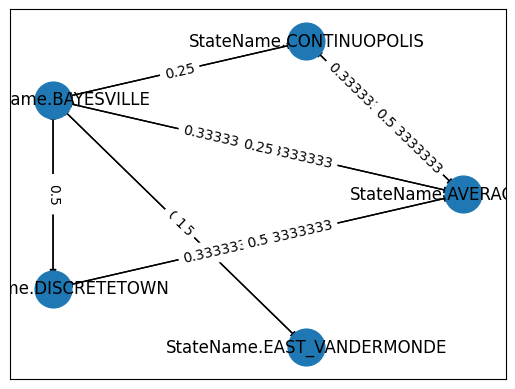

In [22]:
import matplotlib.pyplot as plt
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'transition_probability'));